In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'TSLA'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,274.970001,266.299988,269.690002,273.600006,6908200,273.600006
2019-03-21,276.450012,268.450012,272.600006,274.019989,5947100,274.019989
2019-03-22,272.799988,264.000000,272.579987,264.529999,8745600,264.529999
2019-03-25,263.179993,254.460007,259.709991,260.420013,10215000,260.420013
2019-03-26,270.260010,264.429993,264.440002,267.769989,7350900,267.769989


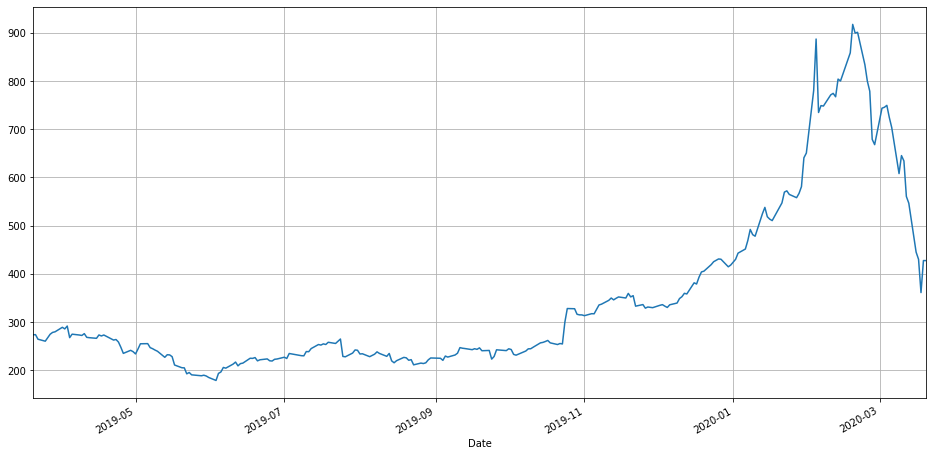

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

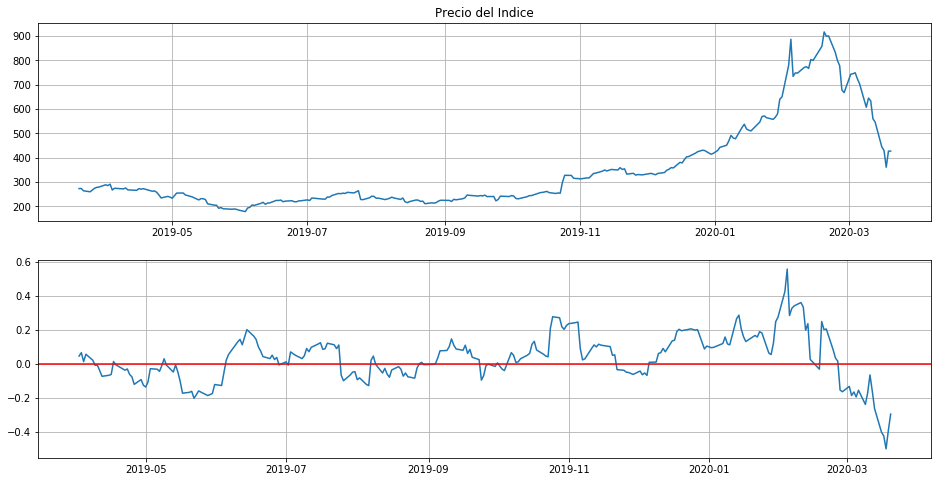

,Close,ROC_10,Recomendación
Date,,,
2019-04-09,272.309998,-0.009169,Se recomienda VENDER la acción.
2019-04-17,271.230011,0.012884,Se recomienda COMPRAR la acción. (DIV)
2019-04-18,273.260010,-0.006183,Se recomienda VENDER la acción. (DIV)
2019-05-09,241.979996,0.029089,Se recomienda COMPRAR la acción. (DIV)
2019-05-10,239.520004,-0.008076,Se recomienda VENDER la acción.
2019-06-05,196.589996,0.020028,Se recomienda COMPRAR la acción.
2019-06-28,223.460007,-0.006977,Se recomienda VENDER la acción. (DIV)
2019-07-01,227.169998,0.010812,Se recomienda COMPRAR la acción.
2019-07-02,224.550003,-0.008303,Se recomienda VENDER la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]